# <font color='green'>Task 1 - Simple Linear Regression</font>  


## Problem Statement: -
### Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

## Author: - Akalbir Singh Chadha

### Importing Dependencies/Packages

In [11]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing The Dataset

In [12]:
#Importing dataset
df = pd.read_csv('task1_data.csv')
print('--------Dataset Imported Sucessfully!---------')
df.head()


--------Dataset Imported Sucessfully!---------


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualizing The Data 

The data is visualised to get a better understanding about the relation between hours and percentage

-------Data Visualized Sucessfully!---------


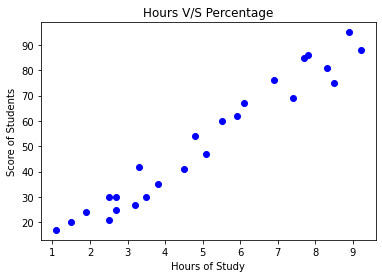

In [13]:
#Plotting data for Visualization 
plt.scatter(df.Hours,df.Scores, color = 'blue')
plt.title('Hours V/S Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Score of Students')
print('-------Data Visualized Sucessfully!---------')
plt.show()


### Dividing The Data Into "attributes" (inputs) And "labels" (outputs).

In [14]:
#Changing data  as attributes (input) and labels (output)
x = df.iloc[:,:-1 ].values #independent variable
y = df.iloc[:, 1].values  # dependent variable


### Splitting The Data For Training And Testing.

In [20]:
from sklearn.model_selection import train_test_split
#Splitting data for training and testing
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)
print('------------------------------Dataset Divided Sucessfully---------------------------------')
print()
print()
print('Training Dataset')
print('Hours = {} \nPercentage = {}'.format(x_train.reshape(1,-1),y_train))
print()
print('Testing Dataset')
print('Hours = {} \nPercentage = {}'.format(x_test.reshape(1,-1),y_test))

------------------------------Dataset Divided Sucessfully---------------------------------


Training Dataset
Hours = [[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
  8.9 4.5]] 
Percentage = [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]

Testing Dataset
Hours = [[1.5 3.2 7.4 2.5 5.9]] 
Percentage = [20 27 69 30 62]


### Training The Data For The Algorithm.

The algorithm that will be used for this task is the Linear Regression ML model. The training data set will be used to train the model and the test dataset will be fed to the model for predictions.

In [21]:
from sklearn import linear_model
#Training the data for Linear Regression
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
print('----------Training Complete-----------')
print('Coefficients :',regr.coef_)
print('Intercepts:',regr.intercept_)


----------Training Complete-----------
Coefficients : [9.91065648]
Intercepts: 2.018160041434683


### Plotting the regression line.

We will now be plotting the Regression line using the straight line equation of Y = MX + C
<br> Where,
<br> Y = Required line 
<br> M = regr.coef_ = 9.91065648
<br> X = Independent Variable (hours)
<br> C = regr.intercept_ = 2.018160041434683


In [22]:
#Plotting the regression line
line = regr.coef_*x + regr.intercept_

### Visualizing The  Regression Line Generated For The Model.

This visualization will give us a better understannding of the model. The x and y variables are scattered plot along the regression line.

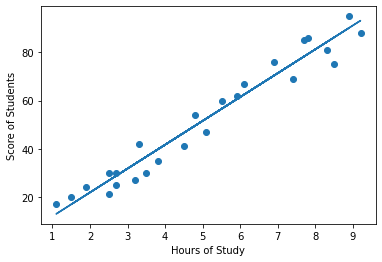

In [36]:
#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.xlabel('Hours of Study')
plt.ylabel('Score of Students')
plt.show()

### Prediction Of The Scores.

The trained model is used for prediction on the test data.

In [34]:
#Prediction of the scores
y_pred = regr.predict(x_test)
print('-------------------Prediction Completed--------------------')

-------------------Prediction Completed--------------------


### Comparing The Actual And Predicted Values
The actual/ expected values and predited values are compared and their difference is also calculated.

In [28]:
# Comparing Predicted and Actual Values
df_pred = pd.DataFrame(( y_test,  y_pred), index = ["Actual","Predicted"]).T  
df_pred["Difference"] = df_pred["Actual"] - df_pred["Predicted"]
df_pred

,Actual,Predicted,Difference
0,20.0,16.884145,3.115855
1,27.0,33.732261,-6.732261
2,69.0,75.357018,-6.357018
3,30.0,26.794801,3.205199
4,62.0,60.491033,1.508967


### Trying To Predict The Score If a Student Studies For 9.25 Hours

The score/percentage obtained by a student if he/she studies for 9.25 hours is 93.69173248737538

In [35]:
#Predicting the score for 9.25 hours
print("--------------------The Score Predicted Sucessfully------------------- ")
hour = np.array([[9.25]])
h_pred = regr.predict(hour)
print('The score for {} hours is :{}'.format(hour[0][0],h_pred[0]))


--------------------The Score Predicted Sucessfully------------------- 
The score for 9.25 hours is :93.69173248737538


### Evaluating The Data

The data evalaution is done to check the accuracy of the model.
<br> The methods used for evaluating this model are: -
<br>  - Mean Absolute Error = 4.183859899002975
<br>  - R2 Score = 0.9546785947197246 = 95.46%
<br>  - Residual Sum of Squares = 107.99384653608699

In [33]:
#Evaluating the model
print('--------------------Model Evaluated Sucessfully!------------------')
# Mean Absolute Error 
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
# R2 Score
from sklearn.metrics import r2_score
print('R2 score of the model is = {}'.format( r2_score(y_pred,y_test)))

# Residual Sum of Squares
rss = np.sum(np.square(y_pred - y_test))
print("RSS of the model is = {}".format(rss))

--------------------Model Evaluated Sucessfully!------------------
Mean Absolute Error: 4.183859899002975
R2 score of the model is = 0.9546785947197246
RSS of the model is = 107.99384653608699
